<a href="https://colab.research.google.com/github/conceptbin/DA_Notebooks/blob/master/Pivot_group_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grouping in pandas

In [42]:
import pandas as pd

First, load the data.

In [43]:
# File path
file = r'https://github.com/conceptbin/DA_Notebooks/raw/master/pandas-intro/data/2023-08-metropolitan-street.csv'
# Create dataframe (df)
df = pd.read_csv(file)

Create a Local_Authority column from LSOA_name.

In [44]:
#Create a new column:
df['Local_Authority'] = df['LSOA name'].str.slice(0, -5)

# Group and aggregate
Functions: `groupby()`. Group by Local Authority, count total number of crime reports for each.

In [45]:
df.keys()

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'Local_Authority'],
      dtype='object')

In [46]:
df_grouped = df.groupby(['Local_Authority'])['Crime type'].agg('count').reset_index()

In [47]:
df_grouped

,Local_Authority,Crime type
0,Arun,4
1,Ashford,2
2,Barking and Dagenham,2138
3,Barnet,2851
4,Basildon,5
...,...,...
164,Woking,1
165,Wokingham,3
166,Worthing,2
167,Wrexham,1


In [48]:
df_grouped.sort_values(by=['Crime type'], ascending=False)[:32]

,Local_Authority,Crime type
159,Westminster,7695
96,Newham,4002
146,Tower Hamlets,3959
26,Camden,3920
125,Southwark,3786
78,Lambeth,3739
37,Croydon,3598
43,Ealing,3407
15,Brent,3397
59,Hackney,3252


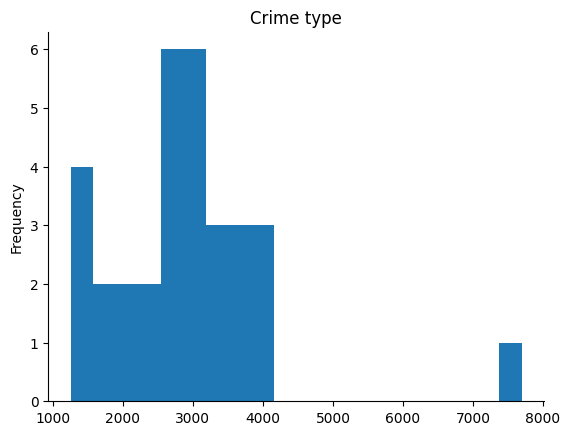

In [49]:
from matplotlib import pyplot as plt
_df_0['Crime type'].plot(kind='hist', bins=20, title='Crime type')
plt.gca().spines[['top', 'right',]].set_visible(False)

Grouping, version 2

In [50]:
df.keys()

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'Local_Authority'],
      dtype='object')

In [51]:
df_grouped2 = df.groupby(['Local_Authority', 'Crime type'])['LSOA name'].agg('count').reset_index()

In [54]:
la_keywords = 'Wandsworth|Hammersmith|Lambeth|Richmond|Merton'
df_grouped2[df_grouped2['Local_Authority'].str.contains('Wandsworth')]

,Local_Authority,Crime type,LSOA name
654,Wandsworth,Anti-social behaviour,640
655,Wandsworth,Bicycle theft,79
656,Wandsworth,Burglary,187
657,Wandsworth,Criminal damage and arson,182
658,Wandsworth,Drugs,60
659,Wandsworth,Other crime,24
660,Wandsworth,Other theft,282
661,Wandsworth,Possession of weapons,11
662,Wandsworth,Public order,128
663,Wandsworth,Robbery,53


# Mess below

## crosstab()
A basic crosstab of crime types broken down by borough.

In [ ]:
df.keys()

In [ ]:
# Count of incidents by borough and crime type:
df_cross = pd.crosstab(df['Local_Authority'], df['Crime type'])

In [ ]:
df_cross

## Working with the crosstab dataframe
If we reset the index, we can filter and sort the crosstabbed dataframe:

In [ ]:
df_cross.reset_index(inplace=True)

Here we select a few boroughs to compare, using a list of keywords. By using the "or" separator | we specify which keywords to include.

In [ ]:
la_keywords = 'Wandsworth|Hammersmith|Lambeth|Richmond'
df_cross = df_cross[df_cross['Local_Authority'].str.contains(la_keywords)]

In [ ]:
df_cross